In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, cohen_kappa_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

warnings.filterwarnings ('ignore')

In [2]:
bank_data = pd.read_csv("../b. Datasets/Churn Prediction/Churn modelling.csv")

In [3]:
bank_data.shape

(10000, 14)

In [4]:
display(bank_data.head(2))
display(bank_data.tail(2))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
bank_data.select_dtypes(include='number').std()

RowNumber           2886.895680
CustomerId         71936.186123
CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

In [8]:
for feature in bank_data.columns:
    print(f'''\nFeature name: {feature}\nTotal number of unique values: {bank_data[feature].nunique()}\nUnique values: {bank_data[feature].unique()}''')


Feature name: RowNumber
Total number of unique values: 10000
Unique values: [    1     2     3 ...  9998  9999 10000]

Feature name: CustomerId
Total number of unique values: 10000
Unique values: [15634602 15647311 15619304 ... 15584532 15682355 15628319]

Feature name: Surname
Total number of unique values: 2932
Unique values: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

Feature name: CreditScore
Total number of unique values: 460
Unique values: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586

In [9]:
bank_data = pd.get_dummies(data=bank_data, 
                           columns=['Gender', 'Geography'])
bank_data

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,False,True,True,False,False
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,False,True,True,False,False
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,True,False,True,False,False
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,True,False


In [10]:
bank_data.select_dtypes(include='number').skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

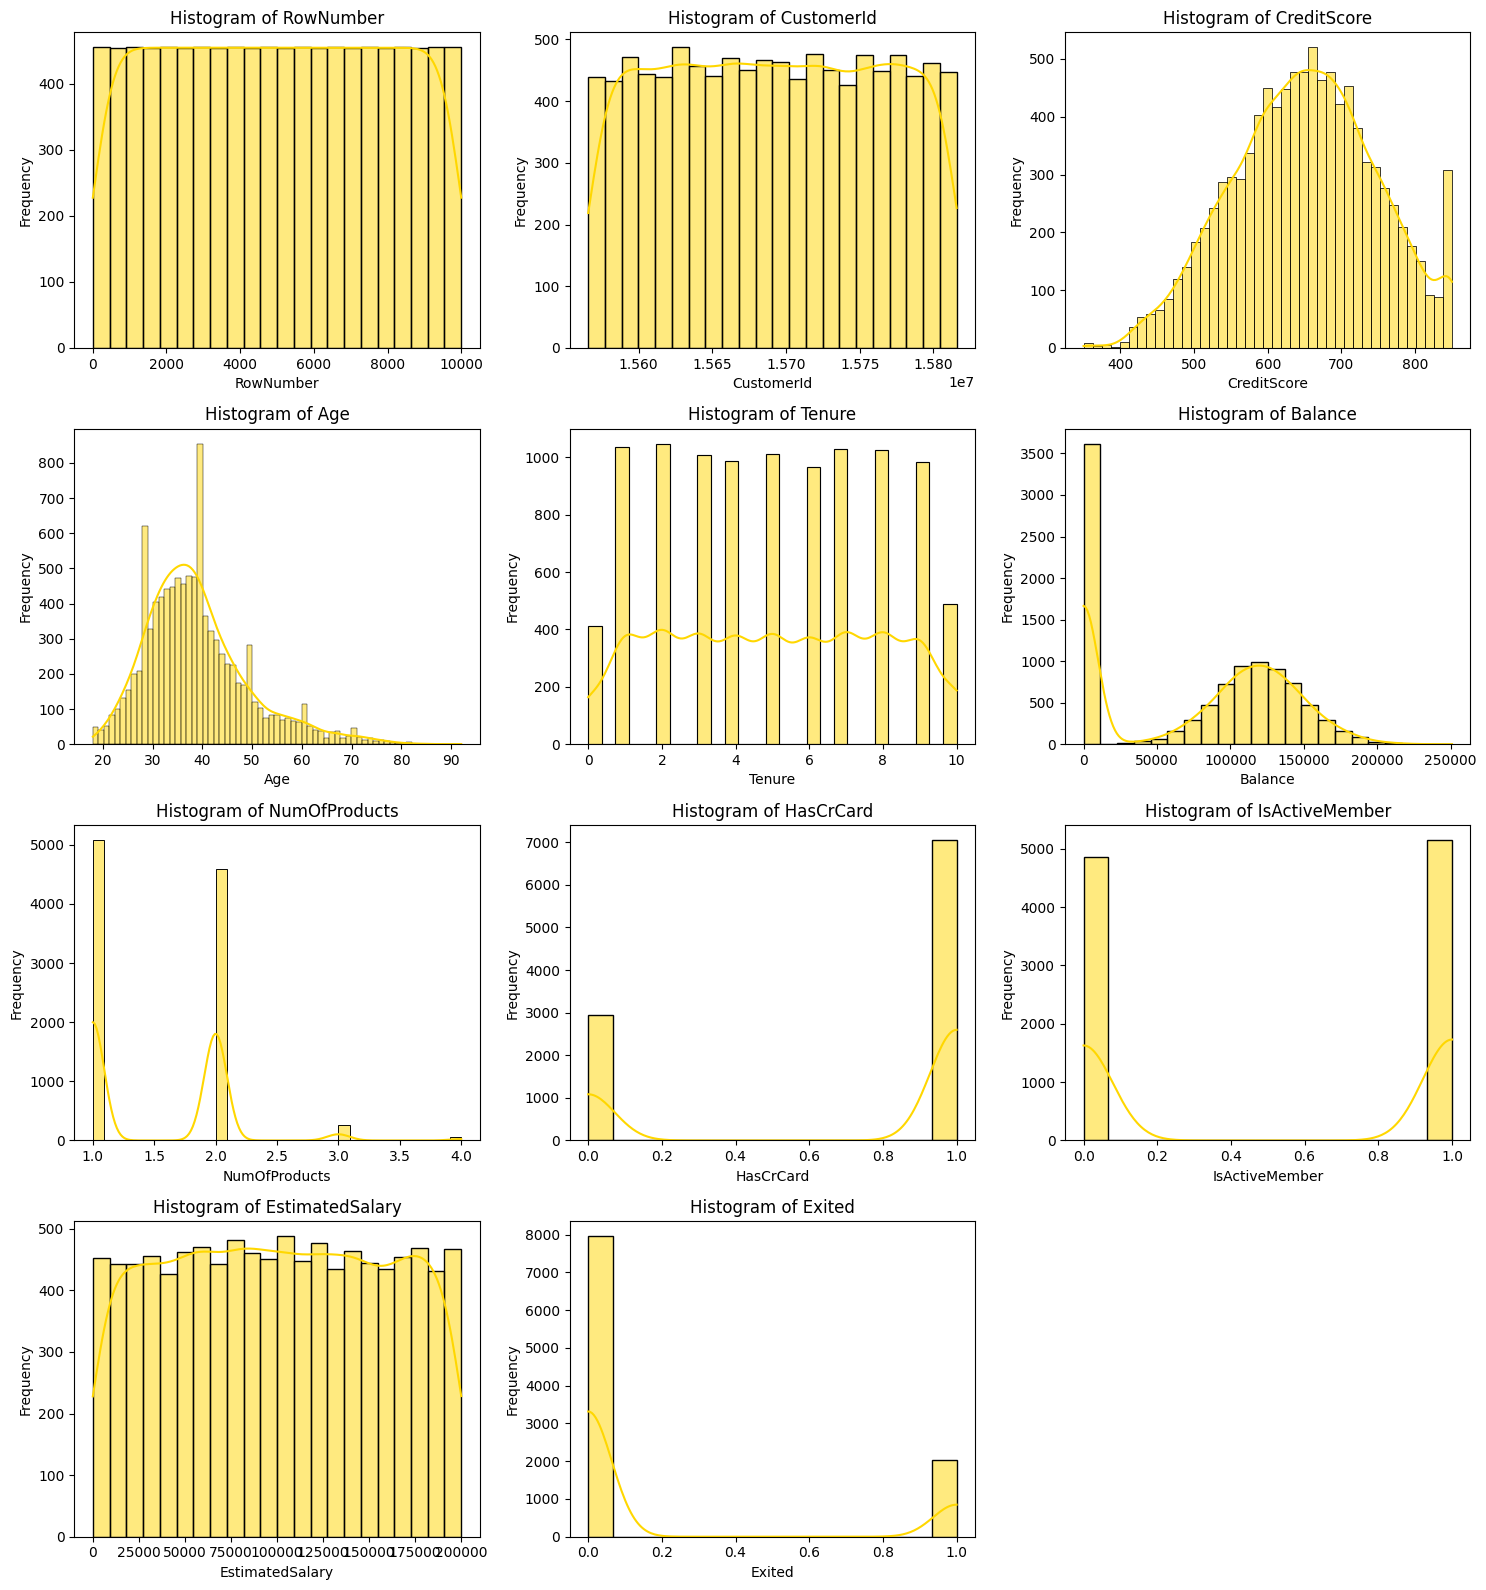

In [11]:
num_columns = bank_data.select_dtypes(include='number').columns

n_cols = 3 
n_rows = (len(num_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(num_columns):
    sns.histplot(bank_data[column], kde=True, ax=axes[i], color='gold')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

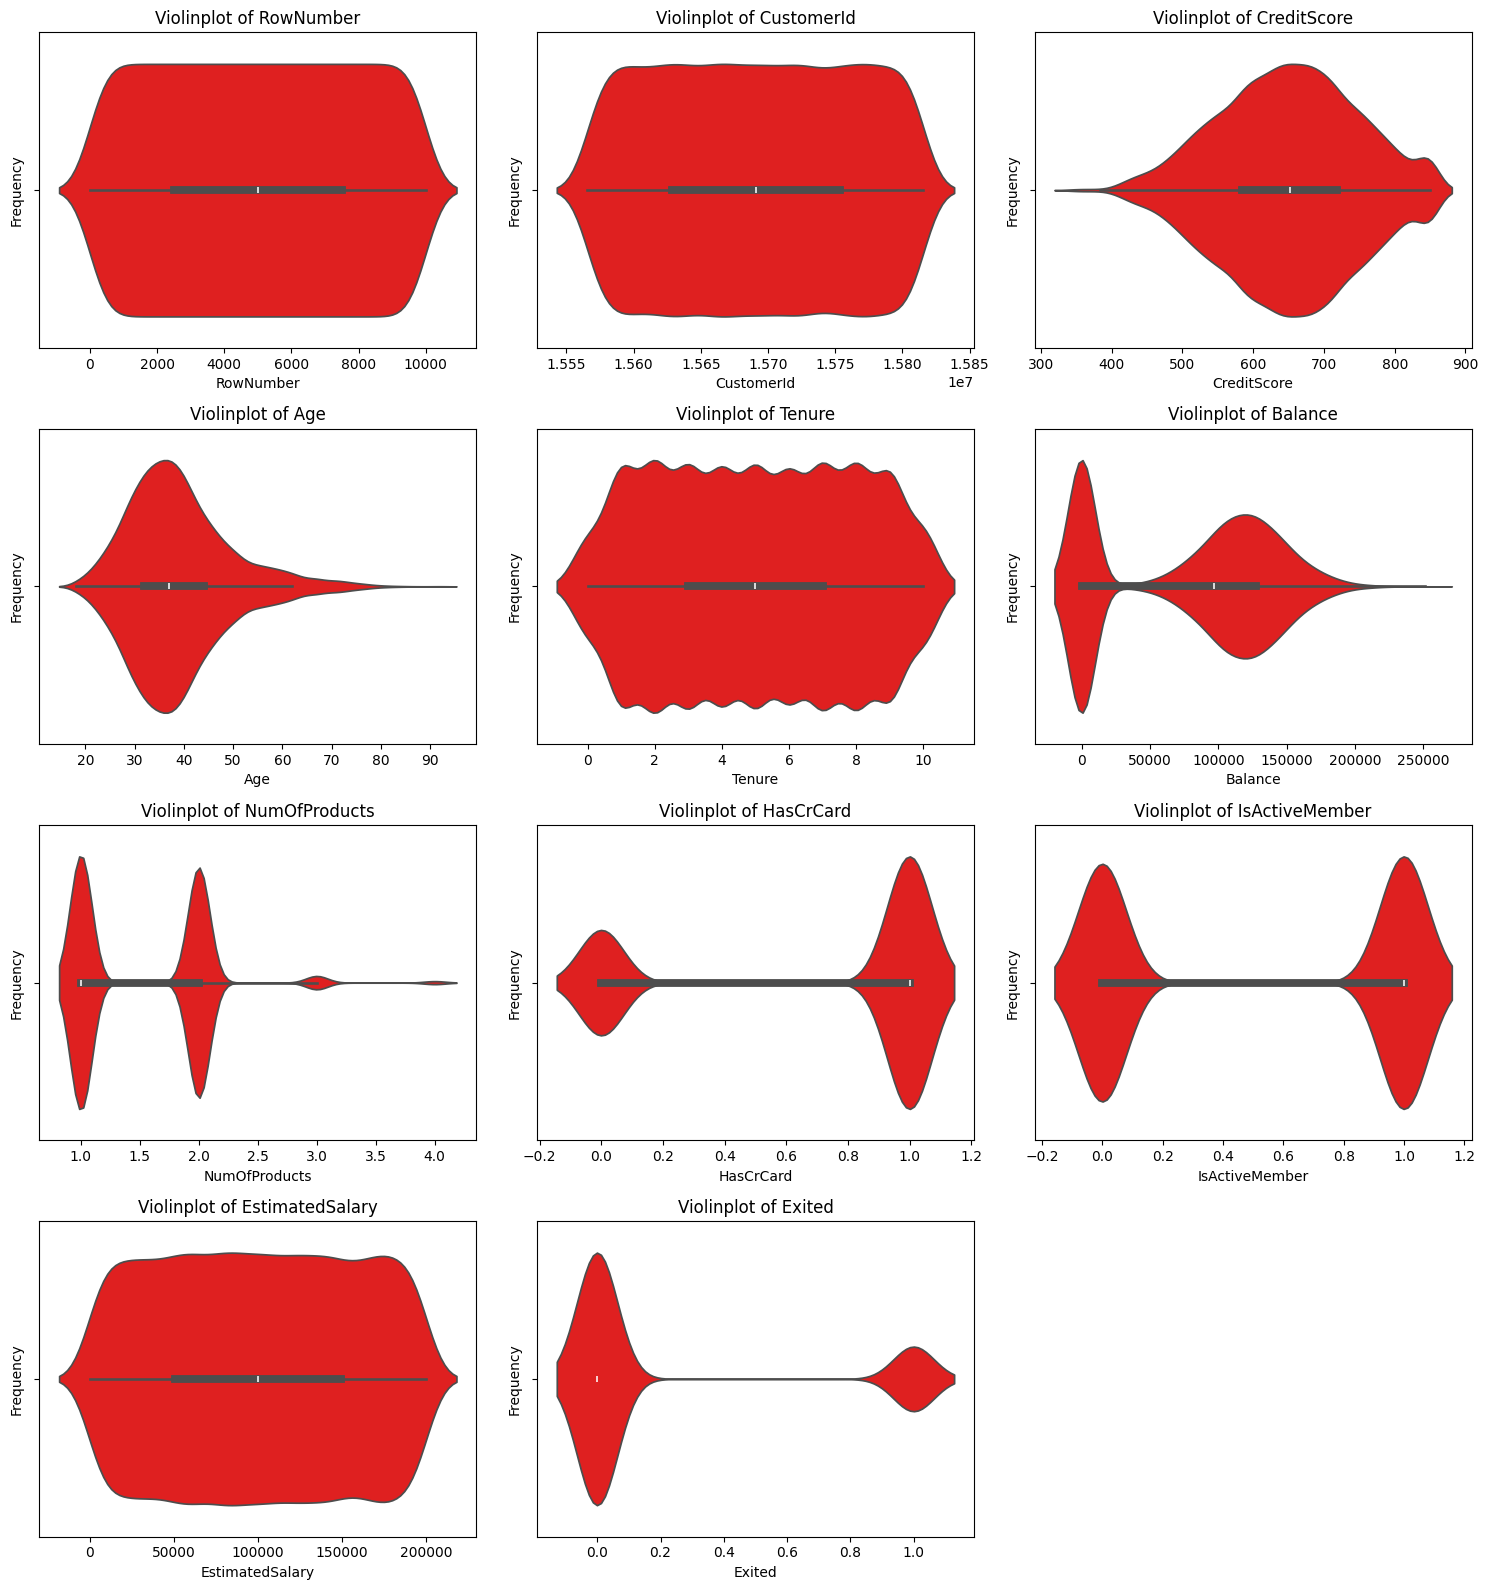

In [12]:
num_columns = bank_data.select_dtypes(include='number').columns

n_cols = 3 
n_rows = (len(num_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(num_columns):
    sns.violinplot(data=bank_data, x=column,ax=axes[i], color='red')
    axes[i].set_title(f'Violinplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [13]:
bank_data.shape

(10000, 17)

In [14]:
z_scores = np.abs(bank_data.select_dtypes(include='number').apply(zscore))
threshold = 3

In [15]:
outliers = (z_scores > 3).sum()
outliers

RowNumber            0
CustomerId           0
CreditScore          8
Age                133
Tenure               0
Balance              0
NumOfProducts       60
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [16]:
bank_data.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

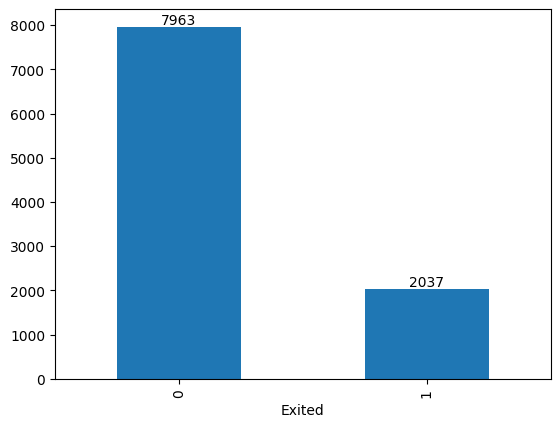

In [17]:
barplot = bank_data.Exited.value_counts().plot(kind='bar')
plt.bar_label(barplot.containers[0], label_type='edge')
plt.show()

In [18]:
bank_data.drop(labels=['RowNumber', 'CustomerId', 'Surname'], 
               axis=1, 
               inplace=True)

In [19]:
display(bank_data.head(2))
display(bank_data.tail(2))

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
9998,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,True,False
9999,792,28,4,130142.79,1,1,0,38190.78,0,True,False,True,False,False


In [20]:
for feature in ['HasCrCard', 'IsActiveMember', 'IsActiveMember']:
    bank_data[feature] = bank_data[feature].astype('bool')

In [21]:
bank_data_cleaned = bank_data[(z_scores < 3).all(axis=1)]

In [22]:
bank_data_cleaned.shape

(9799, 14)

In [23]:
bank_data_cleaned.select_dtypes(include='number').skew()

CreditScore       -0.054670
Age                0.746641
Tenure             0.009423
Balance           -0.140120
NumOfProducts      0.420676
EstimatedSalary    0.002568
Exited             1.501666
dtype: float64

In [24]:
for feature in bank_data_cleaned.select_dtypes(include='number').columns:
    if feature == 'Exited':
        continue
    q1 = bank_data_cleaned[feature].quantile(0.25)
    q3 = bank_data_cleaned[feature].quantile(0.75)
    iqr = q3-q1
    
    upper_bound = q3 + 1.5 *iqr
    lower_bound = q1 - 1.5 * iqr
    
    bank_data_cleaned = bank_data_cleaned[(bank_data_cleaned[feature] >= lower_bound) & (bank_data_cleaned[feature] <= upper_bound)]

In [25]:
bank_data_cleaned.select_dtypes(include='number').skew()

CreditScore       -0.044146
Age                0.361306
Tenure             0.007942
Balance           -0.137121
NumOfProducts      0.404736
EstimatedSalary   -0.002039
Exited             1.551007
dtype: float64

In [26]:
bank_data_cleaned.shape

(9405, 14)

In [27]:
correlation_matrix = bank_data_cleaned.corr()
correlation_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.013834,0.000099,0.008320,0.008490,-0.003626,0.023783,0.002204,-0.020644,0.003108,-0.003108,-0.013124,0.008620,0.006539
Age,-0.013834,1.000000,-0.010871,0.042844,-0.059093,-0.017570,0.001357,-0.003957,0.354848,0.032891,-0.032891,-0.058877,0.067723,0.000188
Tenure,0.000099,-0.010871,1.000000,-0.015610,0.013268,0.019747,-0.028396,0.007376,-0.014280,-0.015417,0.015417,-0.004023,-0.000159,0.004815
Balance,0.008320,0.042844,-0.015610,1.000000,-0.332773,-0.011001,-0.004926,0.010210,0.113623,-0.015072,0.015072,-0.228751,0.400873,-0.137473
NumOfProducts,0.008490,-0.059093,0.013268,-0.332773,1.000000,0.004343,0.011680,0.009889,-0.106381,0.015043,-0.015043,0.000241,-0.020652,0.020440
HasCrCard,-0.003626,-0.017570,0.019747,-0.011001,0.004343,1.000000,-0.011274,-0.013486,-0.008315,-0.006874,0.006874,0.006395,0.012122,-0.019562
IsActiveMember,0.023783,0.001357,-0.028396,-0.004926,0.011680,-0.011274,1.000000,-0.007825,-0.138512,-0.019881,0.019881,-0.000958,-0.014535,0.015691
EstimatedSalary,0.002204,-0.003957,0.007376,0.010210,0.009889,-0.013486,-0.007825,1.000000,0.008541,0.008336,-0.008336,-0.001192,0.011728,-0.010386
Exited,-0.020644,0.354848,-0.014280,0.113623,-0.106381,-0.008315,-0.138512,0.008541,1.000000,0.103239,-0.103239,-0.107610,0.173345,-0.049385
Gender_Female,0.003108,0.032891,-0.015417,-0.015072,0.015043,-0.006874,-0.019881,0.008336,0.103239,1.000000,-1.000000,-0.010209,0.025247,-0.013516


<Axes: >

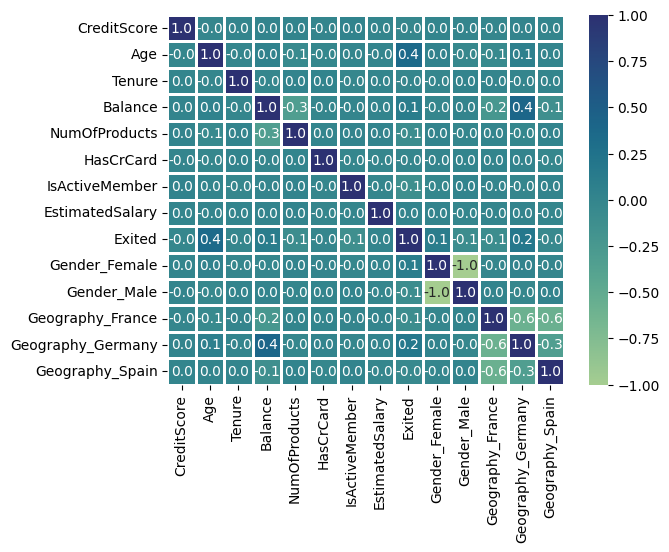

In [28]:
sns.heatmap(correlation_matrix, 
            cmap='crest', 
            annot=True, fmt='.1f', 
            linewidths=0.8)

In [29]:
bank_data_cleaned.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,True,True,101348.88,1,True,False,True,False,False
1,608,41,1,83807.86,1,False,True,112542.58,0,True,False,False,False,True


In [30]:
X = bank_data_cleaned.drop(labels='Exited', axis=1)
y = bank_data_cleaned['Exited']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=0)

In [32]:
display(X_train.head(2))
display(X_test.head(2))
display(y_train.head(2))
display(y_test.head(2))

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
8928,623,29,1,0.00,2,False,False,39382.06,True,False,True,False,False
6859,733,38,3,157658.36,1,False,False,19658.43,True,False,True,False,False


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
5381,850,32,9,141827.33,2,True,True,149458.73,False,True,False,True,False
8665,821,40,1,0.00,2,True,False,194273.12,True,False,True,False,False


8928    0
6859    0
Name: Exited, dtype: int64

5381    0
8665    0
Name: Exited, dtype: int64

In [33]:
log_reg_model = LogisticRegression()
rfc_model = RandomForestClassifier()
dc_model = DecisionTreeClassifier()
xgb_model = XGBClassifier()
gb_model = GradientBoostingClassifier()

In [34]:
log_reg_model.fit(X_train, y_train)
rfc_model.fit(X_train, y_train)
dc_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [35]:
y_test_pred_lg = log_reg_model.predict(X_test)
y_test_pred_rfc = rfc_model.predict(X_test)
y_test_pred_dc = dc_model.predict(X_test)
y_test_pred_xgb = xgb_model.predict(X_test)
y_test_pred_gb = gb_model.predict(X_test)

In [36]:
print("Accuracy - Logistic regression", accuracy_score(y_test, y_test_pred_lg))
print("Accuracy - Random Forest Classifier", accuracy_score(y_test, y_test_pred_rfc))
print("Accuracy - Decision Tree", accuracy_score(y_test, y_test_pred_dc))
print("Accuracy - XG Boost", accuracy_score(y_test, y_test_pred_xgb))
print("Accuracy - Gradient Boosting", accuracy_score(y_test, y_test_pred_gb))

Accuracy - Logistic regression 0.8217576187101346
Accuracy - Random Forest Classifier 0.8667611622962438
Accuracy - Decision Tree 0.7990786676116229
Accuracy - XG Boost 0.8586109142452162
Accuracy - Gradient Boosting 0.8734939759036144


In [37]:
print("Cohen Kappa Score - Logistic regression", cohen_kappa_score(y_test, y_test_pred_lg))
print("Cohen Kappa Score - Random Forest Classifier", cohen_kappa_score(y_test, y_test_pred_rfc))
print("Cohen Kappa Score - Decision Tree", cohen_kappa_score(y_test, y_test_pred_dc))
print("Cohen Kappa Score - XG Boost", cohen_kappa_score(y_test, y_test_pred_xgb))
print("Cohen Kappa Score - Gradient Boosting", cohen_kappa_score(y_test, y_test_pred_gb))

Cohen Kappa Score - Logistic regression 0.18572275935021476
Cohen Kappa Score - Random Forest Classifier 0.496705327446624
Cohen Kappa Score - Decision Tree 0.3628609723406847
Cohen Kappa Score - XG Boost 0.48412153710961303
Cohen Kappa Score - Gradient Boosting 0.5201690606124398


In [38]:
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=0)

In [40]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [41]:
accuracy_score(y_test, log_reg_model.predict(X_test))

0.7875192265436168

In [42]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

accuracy_score(y_test, rfc_model.predict(X_test))

0.8925510876730389

In [43]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9]
}

rfc_model = RandomForestClassifier()

random_search_cv = RandomizedSearchCV(estimator=rfc_model, 
                                      param_distributions=param_grid, 
                                      n_iter=5, 
                                      scoring='accuracy', 
                                      cv=3)

random_search_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy')

In [44]:
best_random_model = random_search_cv.best_estimator_

In [45]:
y_test_pred = best_random_model.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.8765106569984619

In [46]:
cohen_kappa_score(y_test, y_test_pred)

0.7530187263197863

In [47]:
f1_score(y_test, y_test_pred)

0.8734804142278253

In [48]:
confusion_matrix_output = confusion_matrix(y_test, y_test_pred)
confusion_matrix_output

array([[2049,  227],
       [ 335, 1940]], dtype=int64)

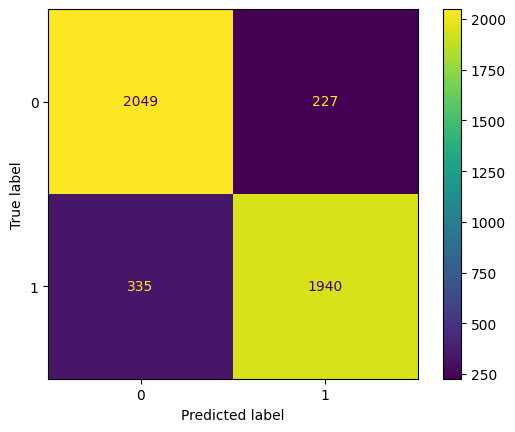

In [49]:
ConfusionMatrixDisplay(confusion_matrix_output).plot(cmap='viridis')

In [50]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2276
           1       0.90      0.85      0.87      2275

    accuracy                           0.88      4551
   macro avg       0.88      0.88      0.88      4551
weighted avg       0.88      0.88      0.88      4551



<Axes: >

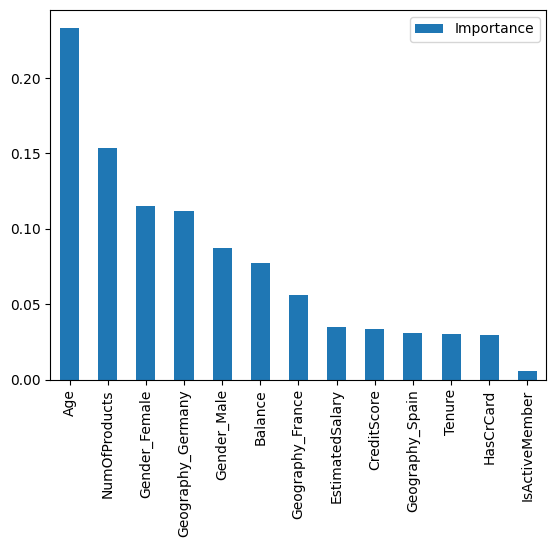

In [51]:
importance_df = pd.DataFrame(
                    data=best_random_model.feature_importances_,
                    index=best_random_model.feature_names_in_,
                    columns=['Importance']
                ).sort_values(by='Importance', 
                              ascending=False)
importance_df.plot(kind='bar')

In [52]:
submission_df = pd.DataFrame({
    'Index': X_test.index,
    'Exited': y_test_pred
}).sort_values(by='Index', ascending=True)

In [53]:
submission_df.to_csv("../d. Output Files/Churn Prediction/Churn Prediction.csv", index=False)